<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_13_KNN_GlassDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
# Implement a KNN model to classify the different types of Glass

## 1. Introduction:<a class="anchor" id="1"></a>
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

1. Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

2. Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

3. Non -Parametric: In KNN, there is no predefined form of the mapping function.

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split

In [ ]:
# Import Dataset

glass_df = pd.read_csv('/content/glass.csv')
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 2. About Dataset<a class="anchor" id="2"></a>
Context
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

Content
Attribute Information:

+ Id number: 1 to 214 (removed from CSV file)
+ RI: refractive index
+ Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
+ Mg: Magnesium
+ Al: Aluminum
+ Si: Silicon
+ K: Potassium
+ Ca: Calcium
+ Ba: Barium
+ Fe: Iron

+ Type of glass: (class attribute)
-- 1 buildingwindowsfloatprocessed
-- 2 buildingwindowsnonfloatprocessed
-- 3 vehiclewindowsfloatprocessed
-- 4 vehiclewindowsnonfloatprocessed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps
Acknowledgements\
https://archive.ics.uci.edu/ml/datasets/Glass+Identification
Source:

Creator: \
B. German\
Central Research Establishment\
Home Office Forensic Science Service\
Aldermaston, Reading, Berkshire RG7 4PN\


Donor:\
Vina Spiehler, Ph.D., DABFT\
Diagnostic Products Corporation\
(213) 776-0180 (ext 3014)\

## 3. Data Exploration <a class="anchor" id="3"></a>

In [ ]:
glass_df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

### 3.1 Descriptive Analysis<a class="anchor" id="3.1"></a>

In [ ]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
# Checking for duplicate records
glass_df[glass_df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
# Dropping duplicate records

glass_df.drop_duplicates(inplace=True)

In [ ]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale. For example Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check the distribution of the glass types.

In [ ]:
glass_df.Type.unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
glass_df.Type.value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

The dataset is pretty unbalanced. The instances of types 1 and 2 constitute more than 67 % of the glass types.

## 4. Data Visualization<a class="anchor" id="4"></a>

+ #####  Univariate plots<a class="anchor" id="4.1"></a>

<ipython-input-16-fba6f46cce9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glass_df[feature], kde=False, label='Skew = %.3f' %(skew), bins = 30)


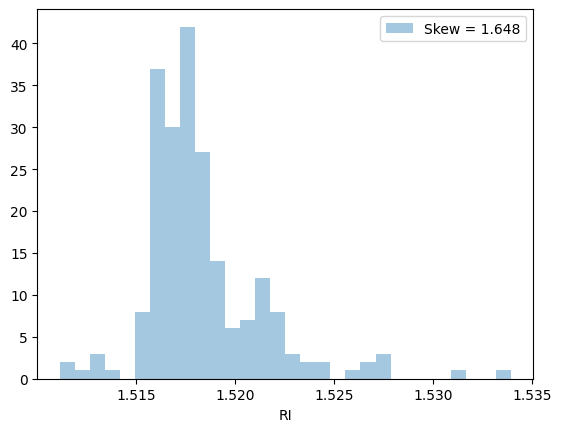

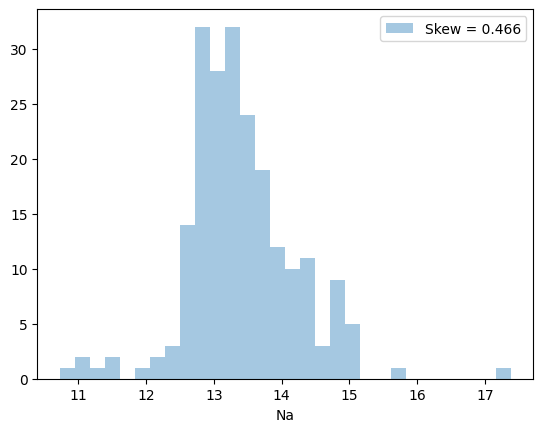

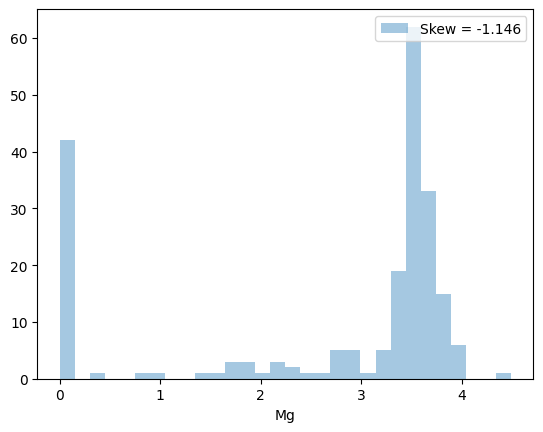

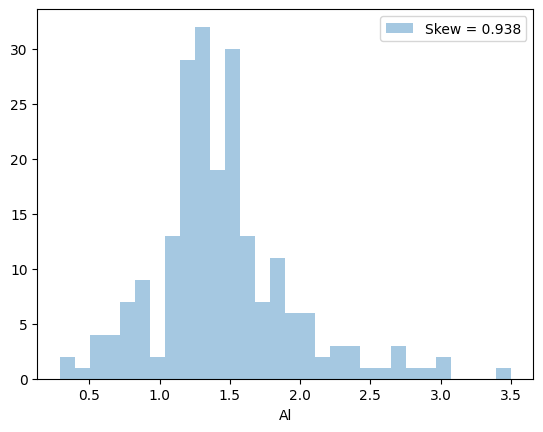

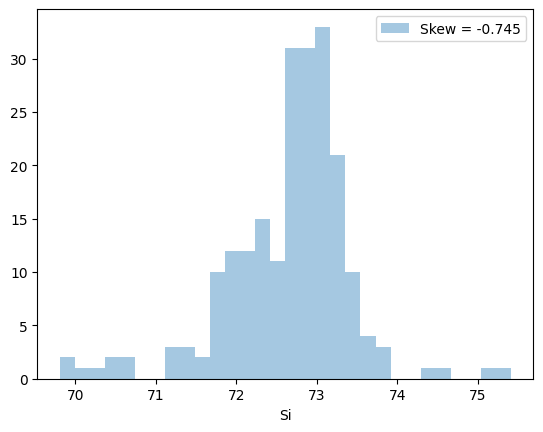

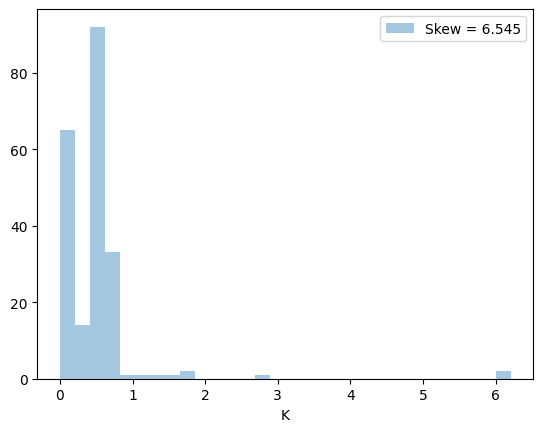

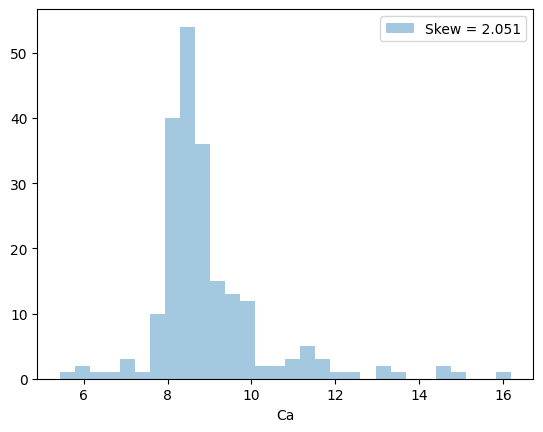

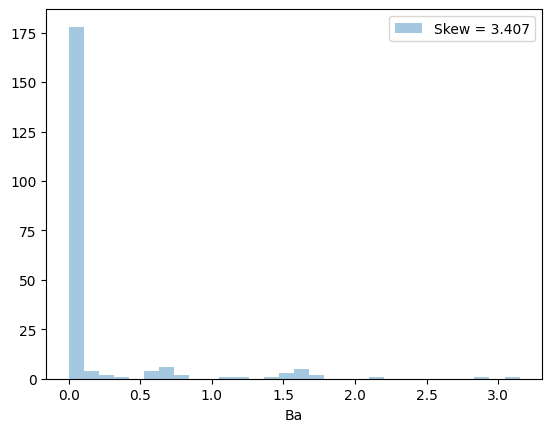

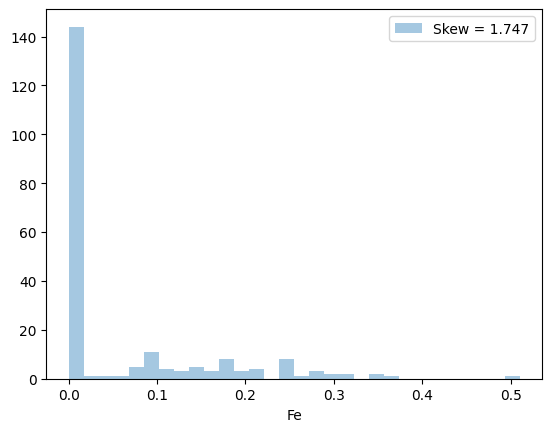

In [ ]:
features = glass_df.columns[:-1].tolist()
for feature in features:
  skew = glass_df[feature].skew()
  sns.distplot(glass_df[feature], kde=False, label='Skew = %.3f' %(skew), bins = 30)
  plt.legend(loc='upper right')
  plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

## Outlier Detection

In [ ]:
list(glass_df)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

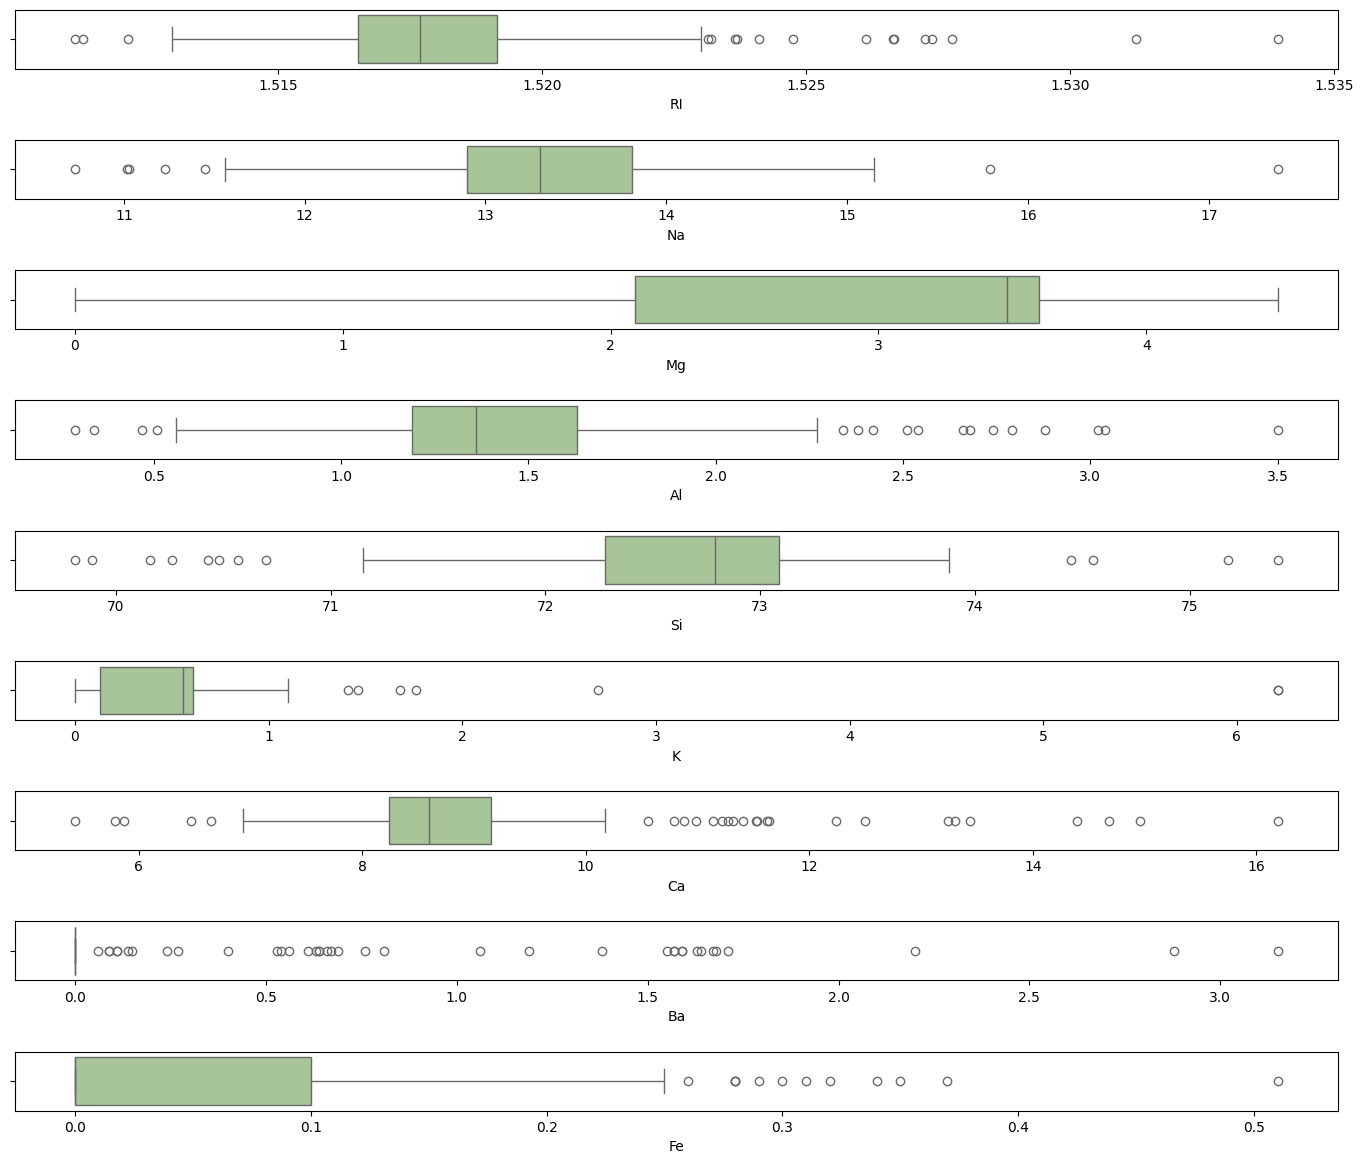

In [ ]:
ot = glass_df.copy()
fig,ax = plt.subplots(9,1,figsize = (14,12), sharex=False, sharey=False)
sns.boxplot(x = 'RI', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[0])
sns.boxplot(x = 'Na', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[1])
sns.boxplot(x = 'Mg', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[2])
sns.boxplot(x = 'Al', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[3])
sns.boxplot(x = 'Si', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[4])
sns.boxplot(x = 'K', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[5])
sns.boxplot(x = 'Ca', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[6])
sns.boxplot(x = 'Ba', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[7])
sns.boxplot(x = 'Fe', data=ot, hue=ot.shape[0], legend=False, palette='crest', ax = ax[8])
plt.tight_layout(pad=2.0)

<Axes: >

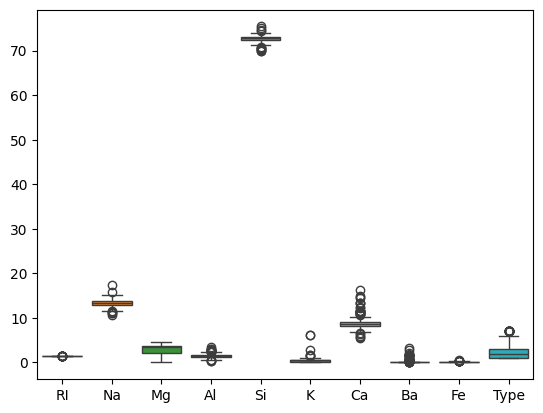

In [ ]:
sns.boxplot(glass_df)

#### Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

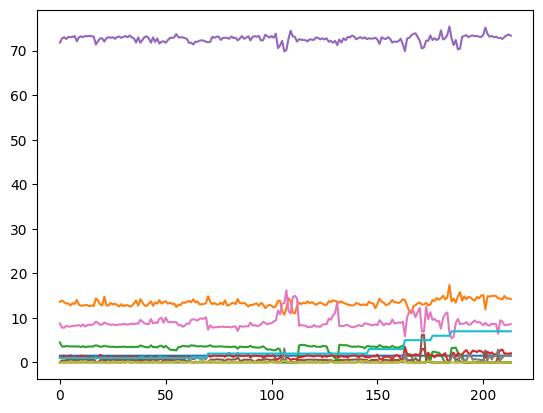

In [ ]:
plt.plot(glass_df)

+ #### Multivariate Analysis<a class="anchor" id="4.2"></a>


Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Figure size 900x900 with 0 Axes>

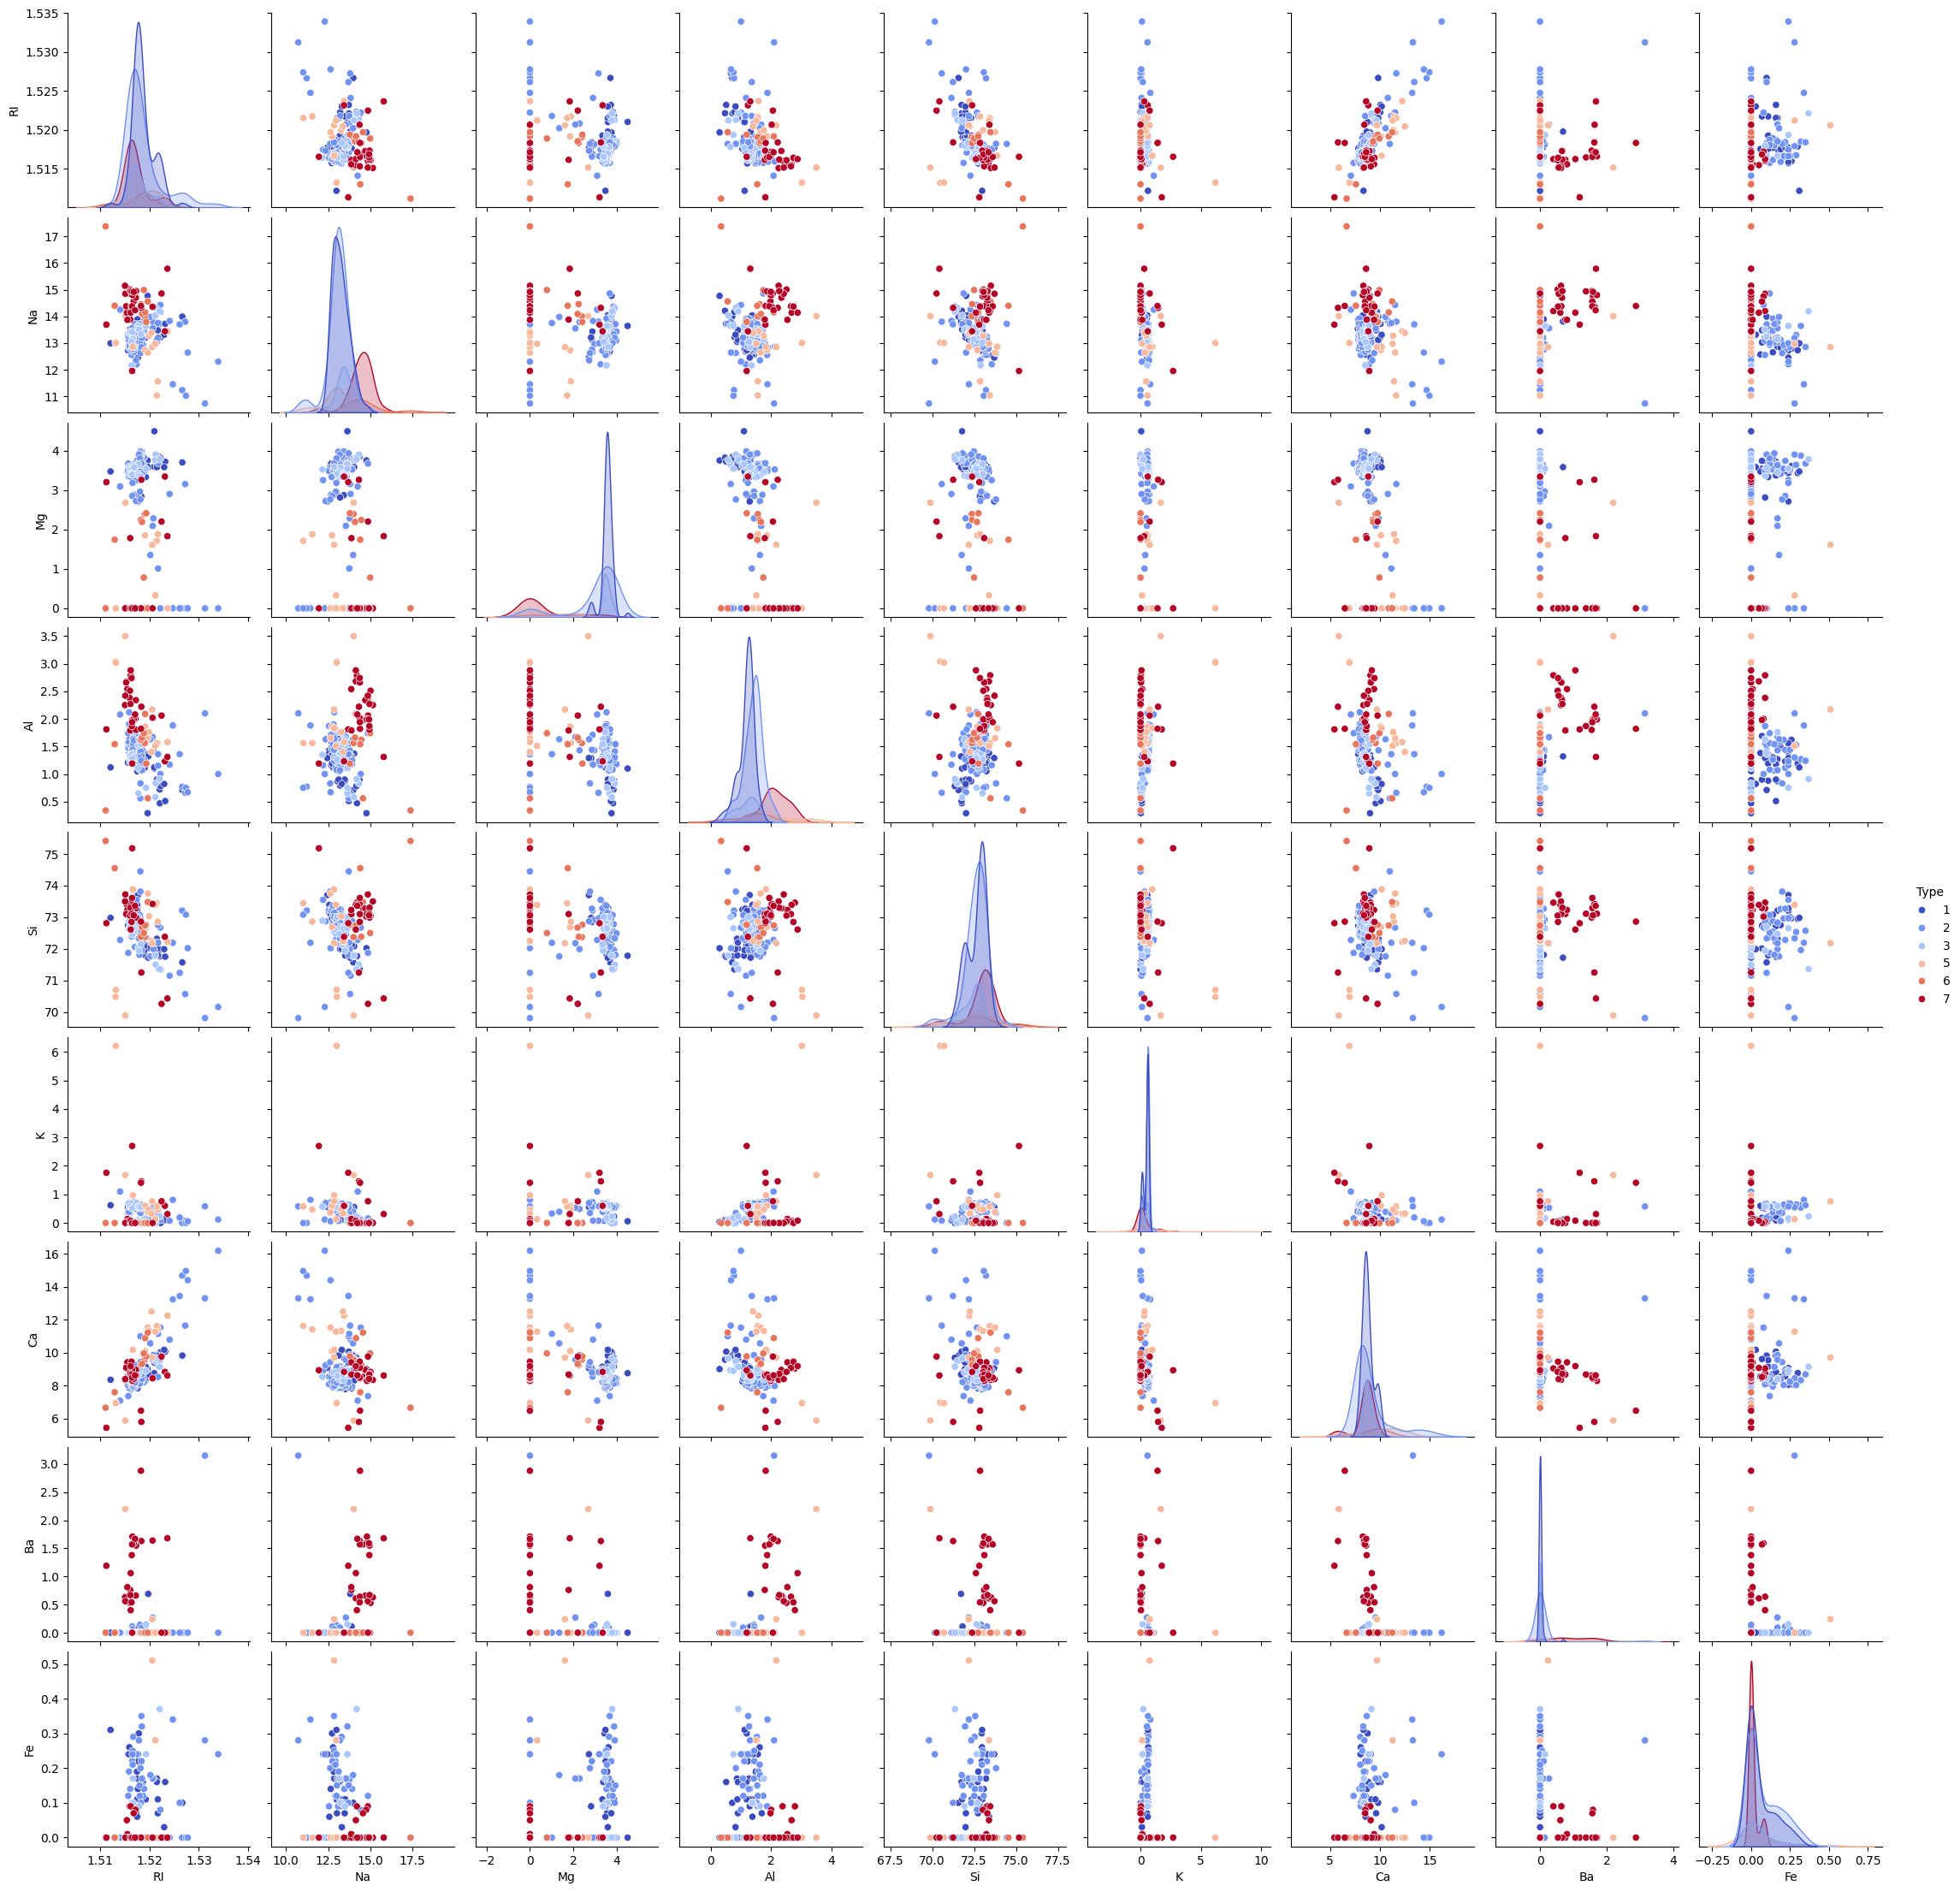

In [ ]:
plt.figure(figsize=(9,9))
sns.pairplot(glass_df, hue='Type', palette='coolwarm')
plt.show()

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

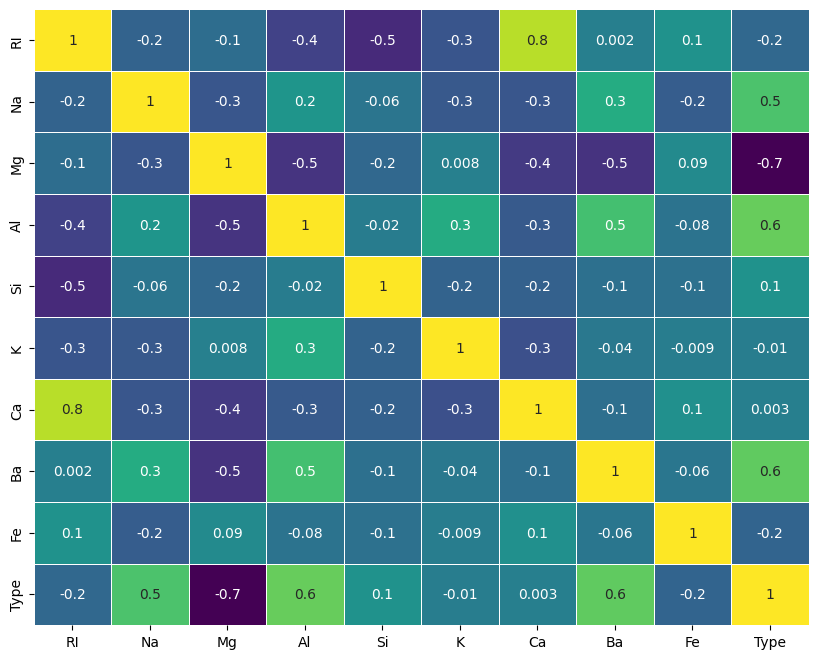

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(glass_df.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=False, linewidths=0.5, )

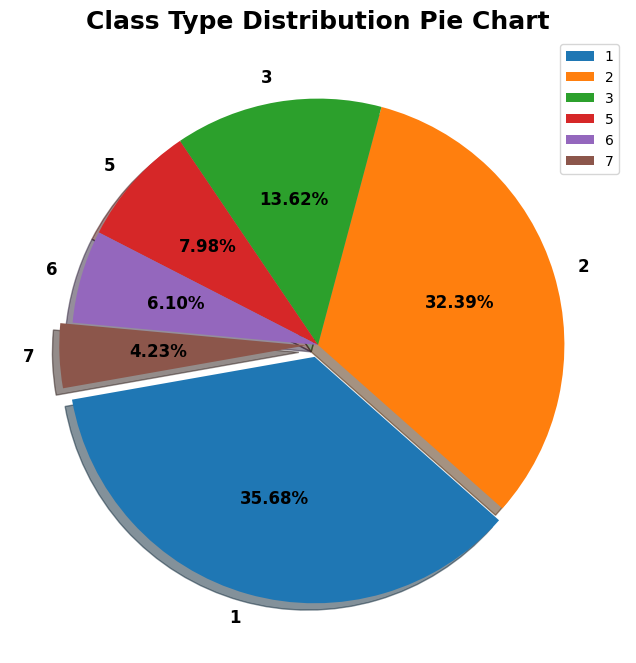

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(glass_df['Type'].value_counts(),
       labels=glass_df.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

## 5. Data Pre-Processing<a class="anchor" id="5"></a>

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass_df[features]))))

The dataset contains 14 observations with more than 2 outliers


In [ ]:
outlier_indices = outlier_hunt(glass_df[features])
df = glass_df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Removing observations with multiple outliers (more than 2) leaves us with 200 observations to learn from. Let's now see how our distributions look like.

<ipython-input-44-491f77cfac17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)


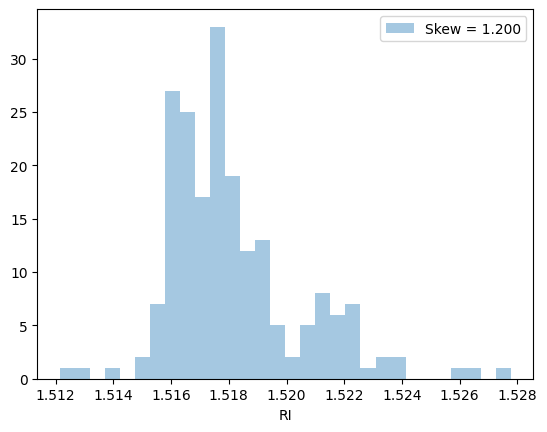

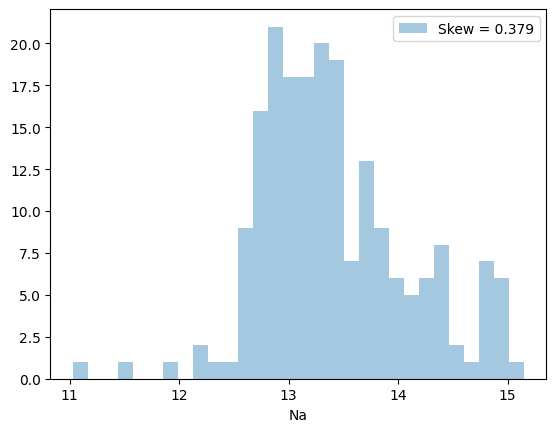

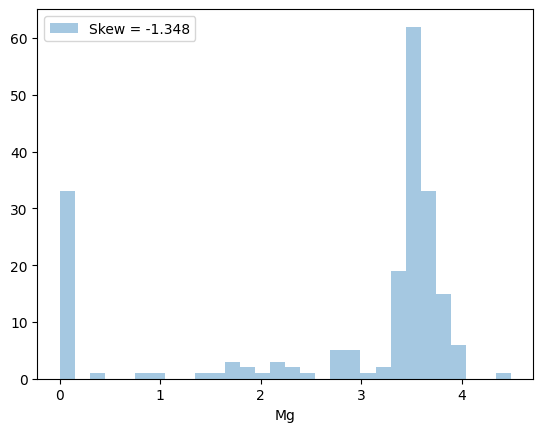

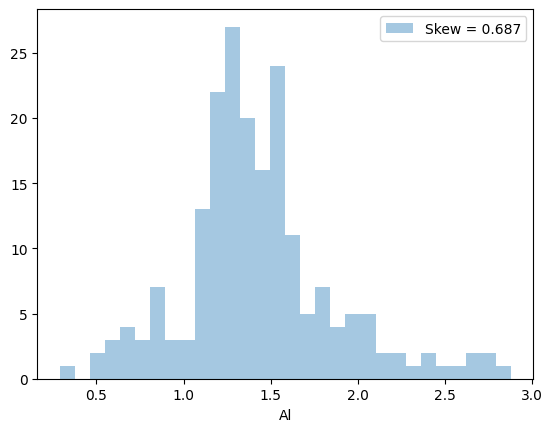

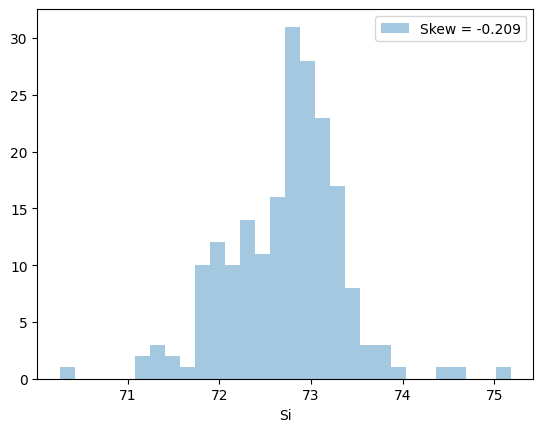

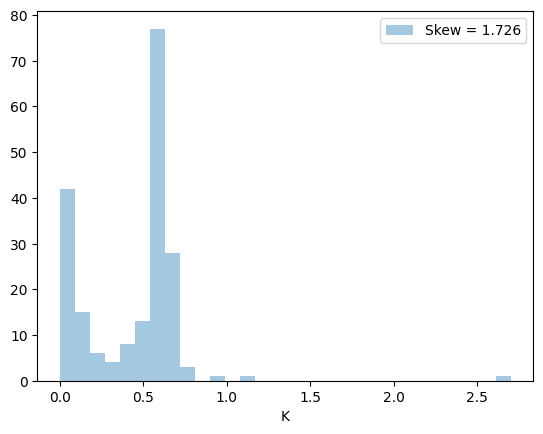

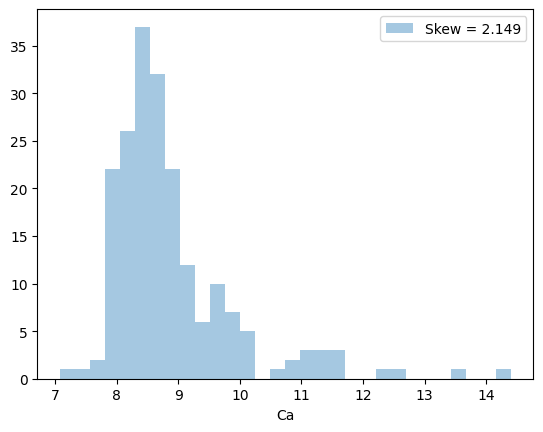

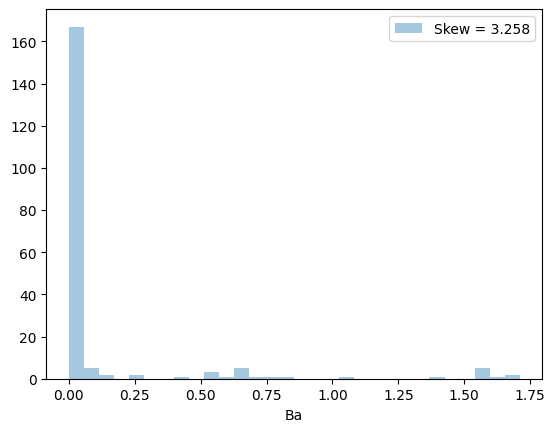

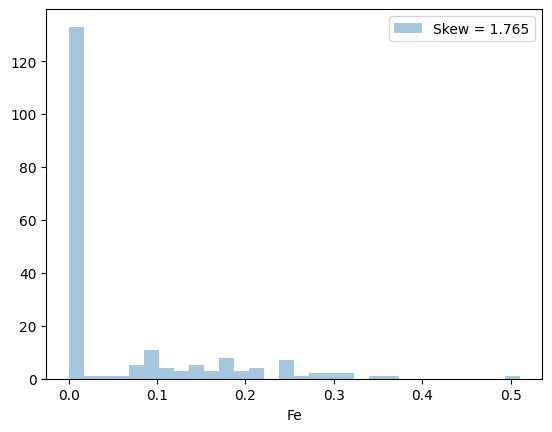

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## 5.2 Dimensionality reduction<a class="anchor" id="5.2"></a>
+ **`PCA`**
Let's go ahead and perform a PCA on the features to decorrelate the ones that are linearly dependent and then let's plot the cumulative explained variance.

## 5.3 Test Train Split and Cross Validation methods<a class="anchor" id="5.3"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [ ]:
x = glass_df.drop('Type', axis=1)
y = glass_df.Type

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (64, 9)
Shape of y_train:  (149,)
Shape of y_test (64,)


### 5.4 Standardize the Variables <a class="anchor" id="5.4"></a>
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## 6. How to choose the value for K?<a class="anchor" id="6"></a>
K is a crucial parameter in the KNN algorithm. Some suggestions for choosing K Value are:

1. Using error curves: The figure below shows error curves for different values of K for training and test data.

![image.png](attachment:image.png)

### 6.1 Grid search for choosing the best Value of K<a class="anchor" id="6.1"></a>

In [ ]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(64,1)
    score = cross_val_score(knn,x_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    # error_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

In [ ]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.6339826839826839
{'n_neighbors': 3}


### 6.2 Visualizing the CV results<a class="anchor" id="6.2"></a>


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

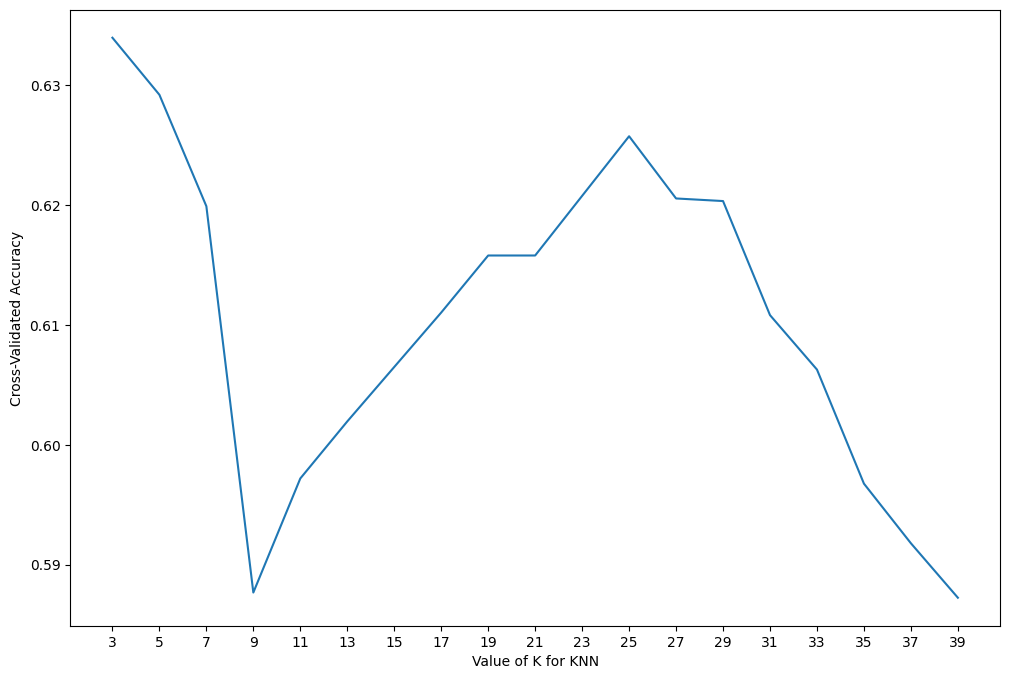

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

##### We can take K = 3

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

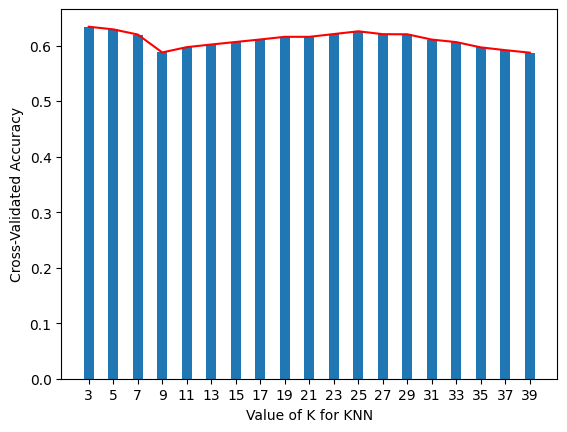

<Figure size 1200x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 20
k_range = [2*i+1 for i in range(1,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

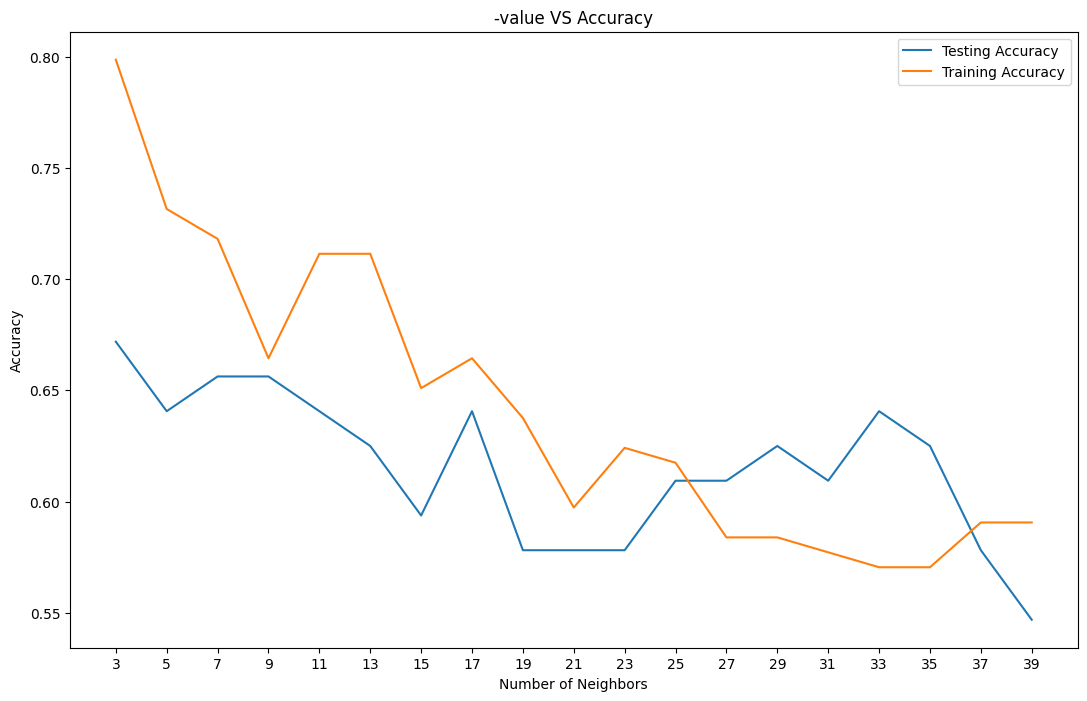

In [ ]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()

### 7. Applying KNN<a class="anchor" id="7"></a>

### 7.1 Predictions and Evaluations<a class="anchor" id="7.1"></a>
Let's evaluate our KNN model!

#### 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



#### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

#### 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall.
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> >
> > Precision = TP/TP+FP
> >
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> >
> > Recall = TP/TP+FN
> >
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
> >
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        
        
For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
                        : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

#### 7.2 Applying KNN using K=3<a class="anchor" id="7.2"></a>

In [ ]:
# NOW WITH K=3
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[17  3  0  0  0  0]
 [ 7 17  0  1  0  0]
 [ 6  1  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.57      0.85      0.68        20
           2       0.77      0.68      0.72        25
           3       1.00      0.12      0.22         8
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.78      1.00      0.88         7

    accuracy                           0.67        64
   macro avg       0.60      0.53      0.50        64
weighted avg       0.70      0.67      0.63        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


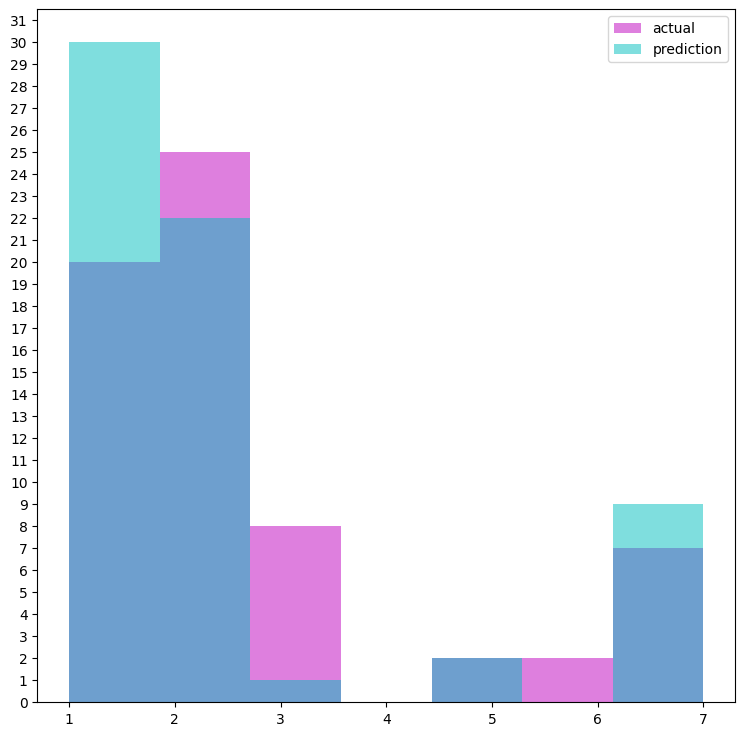

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,32))
ax.legend(loc = 'best')
plt.show()

#### 7.3 K-Nearest Neighbors (K-NN)<a class="anchor" id="7.3"></a>

In [ ]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [ ]:
parameters = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,11,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv = 10)
classifier_knn = classifier_knn.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
y_pred_knn_train = classifier_knn.predict(x_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set Accuracy: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(x_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set Accuracy: ", accuracy_knn_test)

Training set Accuracy:  1.0
Test set Accuracy:  0.609375


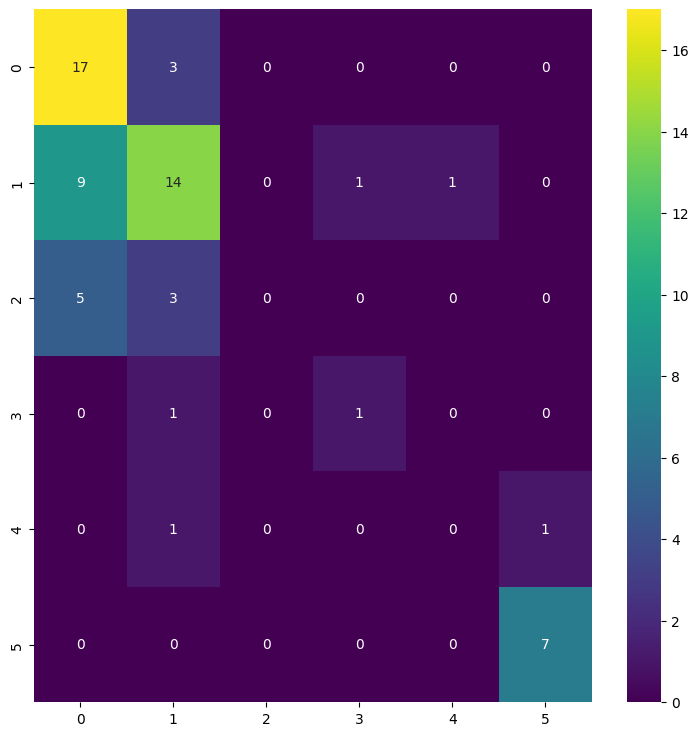

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

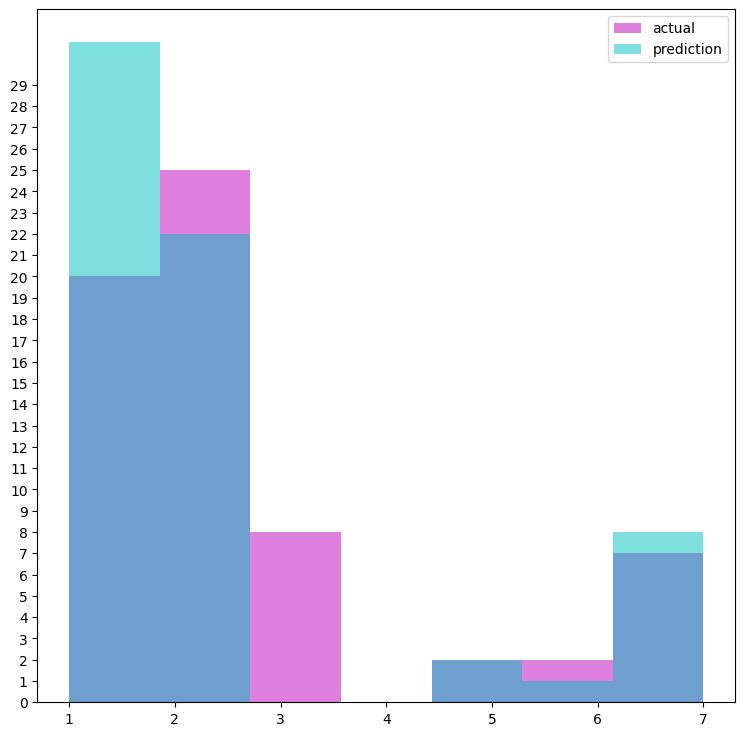

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred_knn_test, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,30))
ax.legend(loc = 'best')
plt.show()

## 8 Inference<a class="anchor" id="8"></a>
### So interestingly,
**`The duplicated values and the outliers were removed from the dataset,
Standard Scaler was used to scaled on the train and test data
Grid Serach was used to find the optimal k value for the KNN algorithm
The accuracy of KNN models was greater then every value where n=3
`**